# Preprocessing

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

%load_ext autoreload
%autoreload 2

import re
import sys
import matplotlib
%matplotlib inline
import pandas as pd 
import numpy as np 
import src.model as model 
import src.utils as utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from src.model import *

df = utils.preprocessing()      

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

X = df.loc[:, df.columns != 'AE']
y = df['AE']

/usr/local/Caskroom/miniconda/base/envs/ml4down/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Random Forest + Boruta

==> MSE: 142.4944203756114
==> R2": 0.5161718128269197



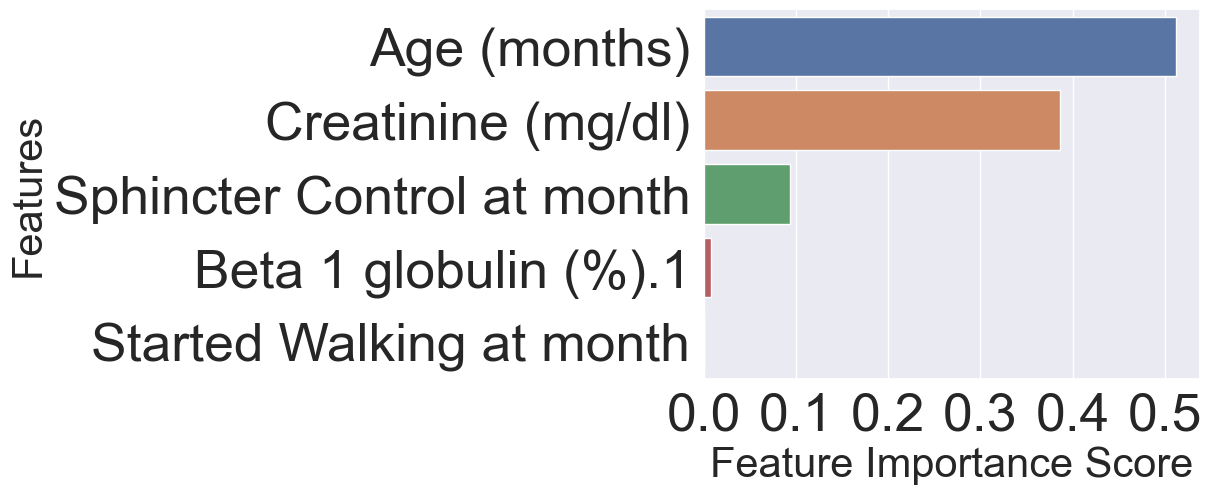

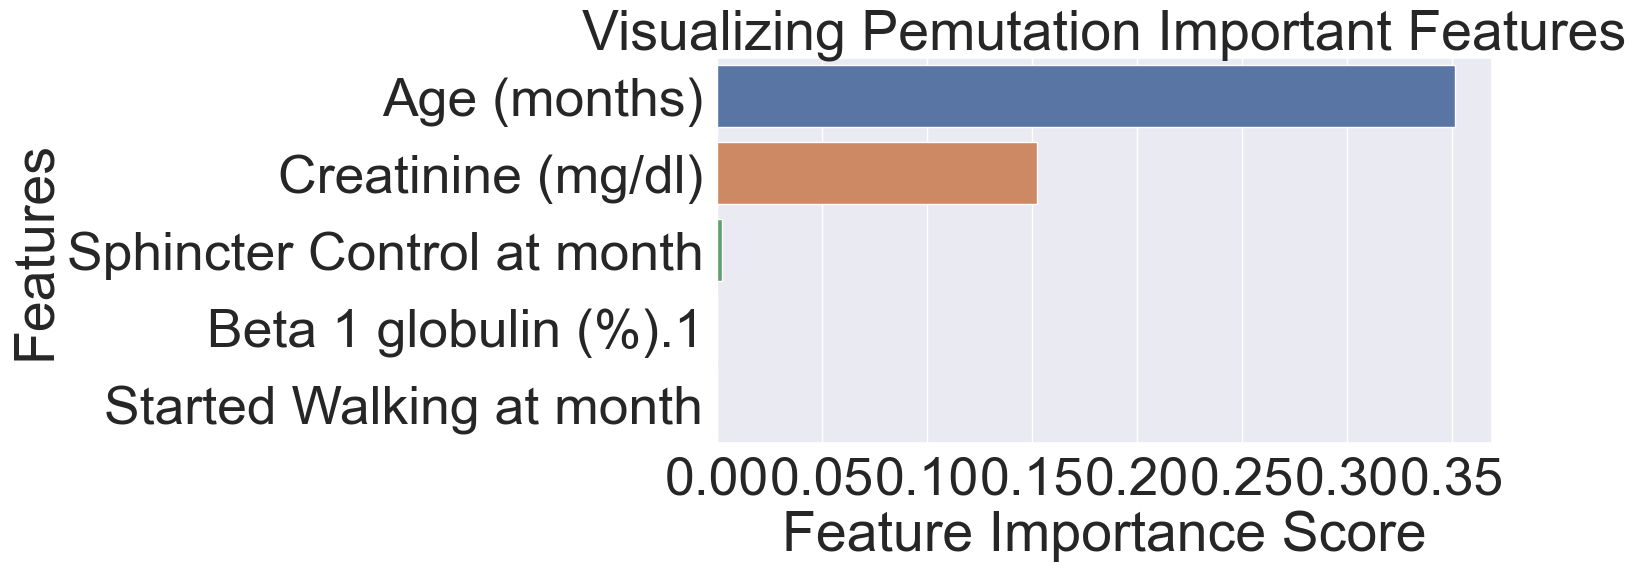

In [2]:
params = {'max_depth': 5,
          'max_features': 0.6,
          'min_samples_leaf': 20,
          'min_samples_split': 20,
          'n_estimators': 50,
          'score': 'neg_mean_squared_error',
          'train_size': 0.7}

features = ['Age (months)', 'Creatinine (mg/dl)', 'Beta 1 globulin (%).1', 'Started Walking at month',
            'Sphincter Control at month']

score = 'neg_mean_squared_error'

forest = utils.feature_importance_model(RandomForest, X, y, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()

# Random Forest + Age Effect Mitigation

In [3]:
target_var = 'Age (months)'
#df = df.sort_values("Age (months)")  # for plotting purposes
df = utils.effect_mitigation(df)
X = df.drop(columns=['AE', 'Age (months)'], axis=1)
y = df['AE']

/usr/local/Caskroom/miniconda/base/envs/ml4down/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


==> MSE: 0.0007018601092203601
==> R2": 0.14221366860884765



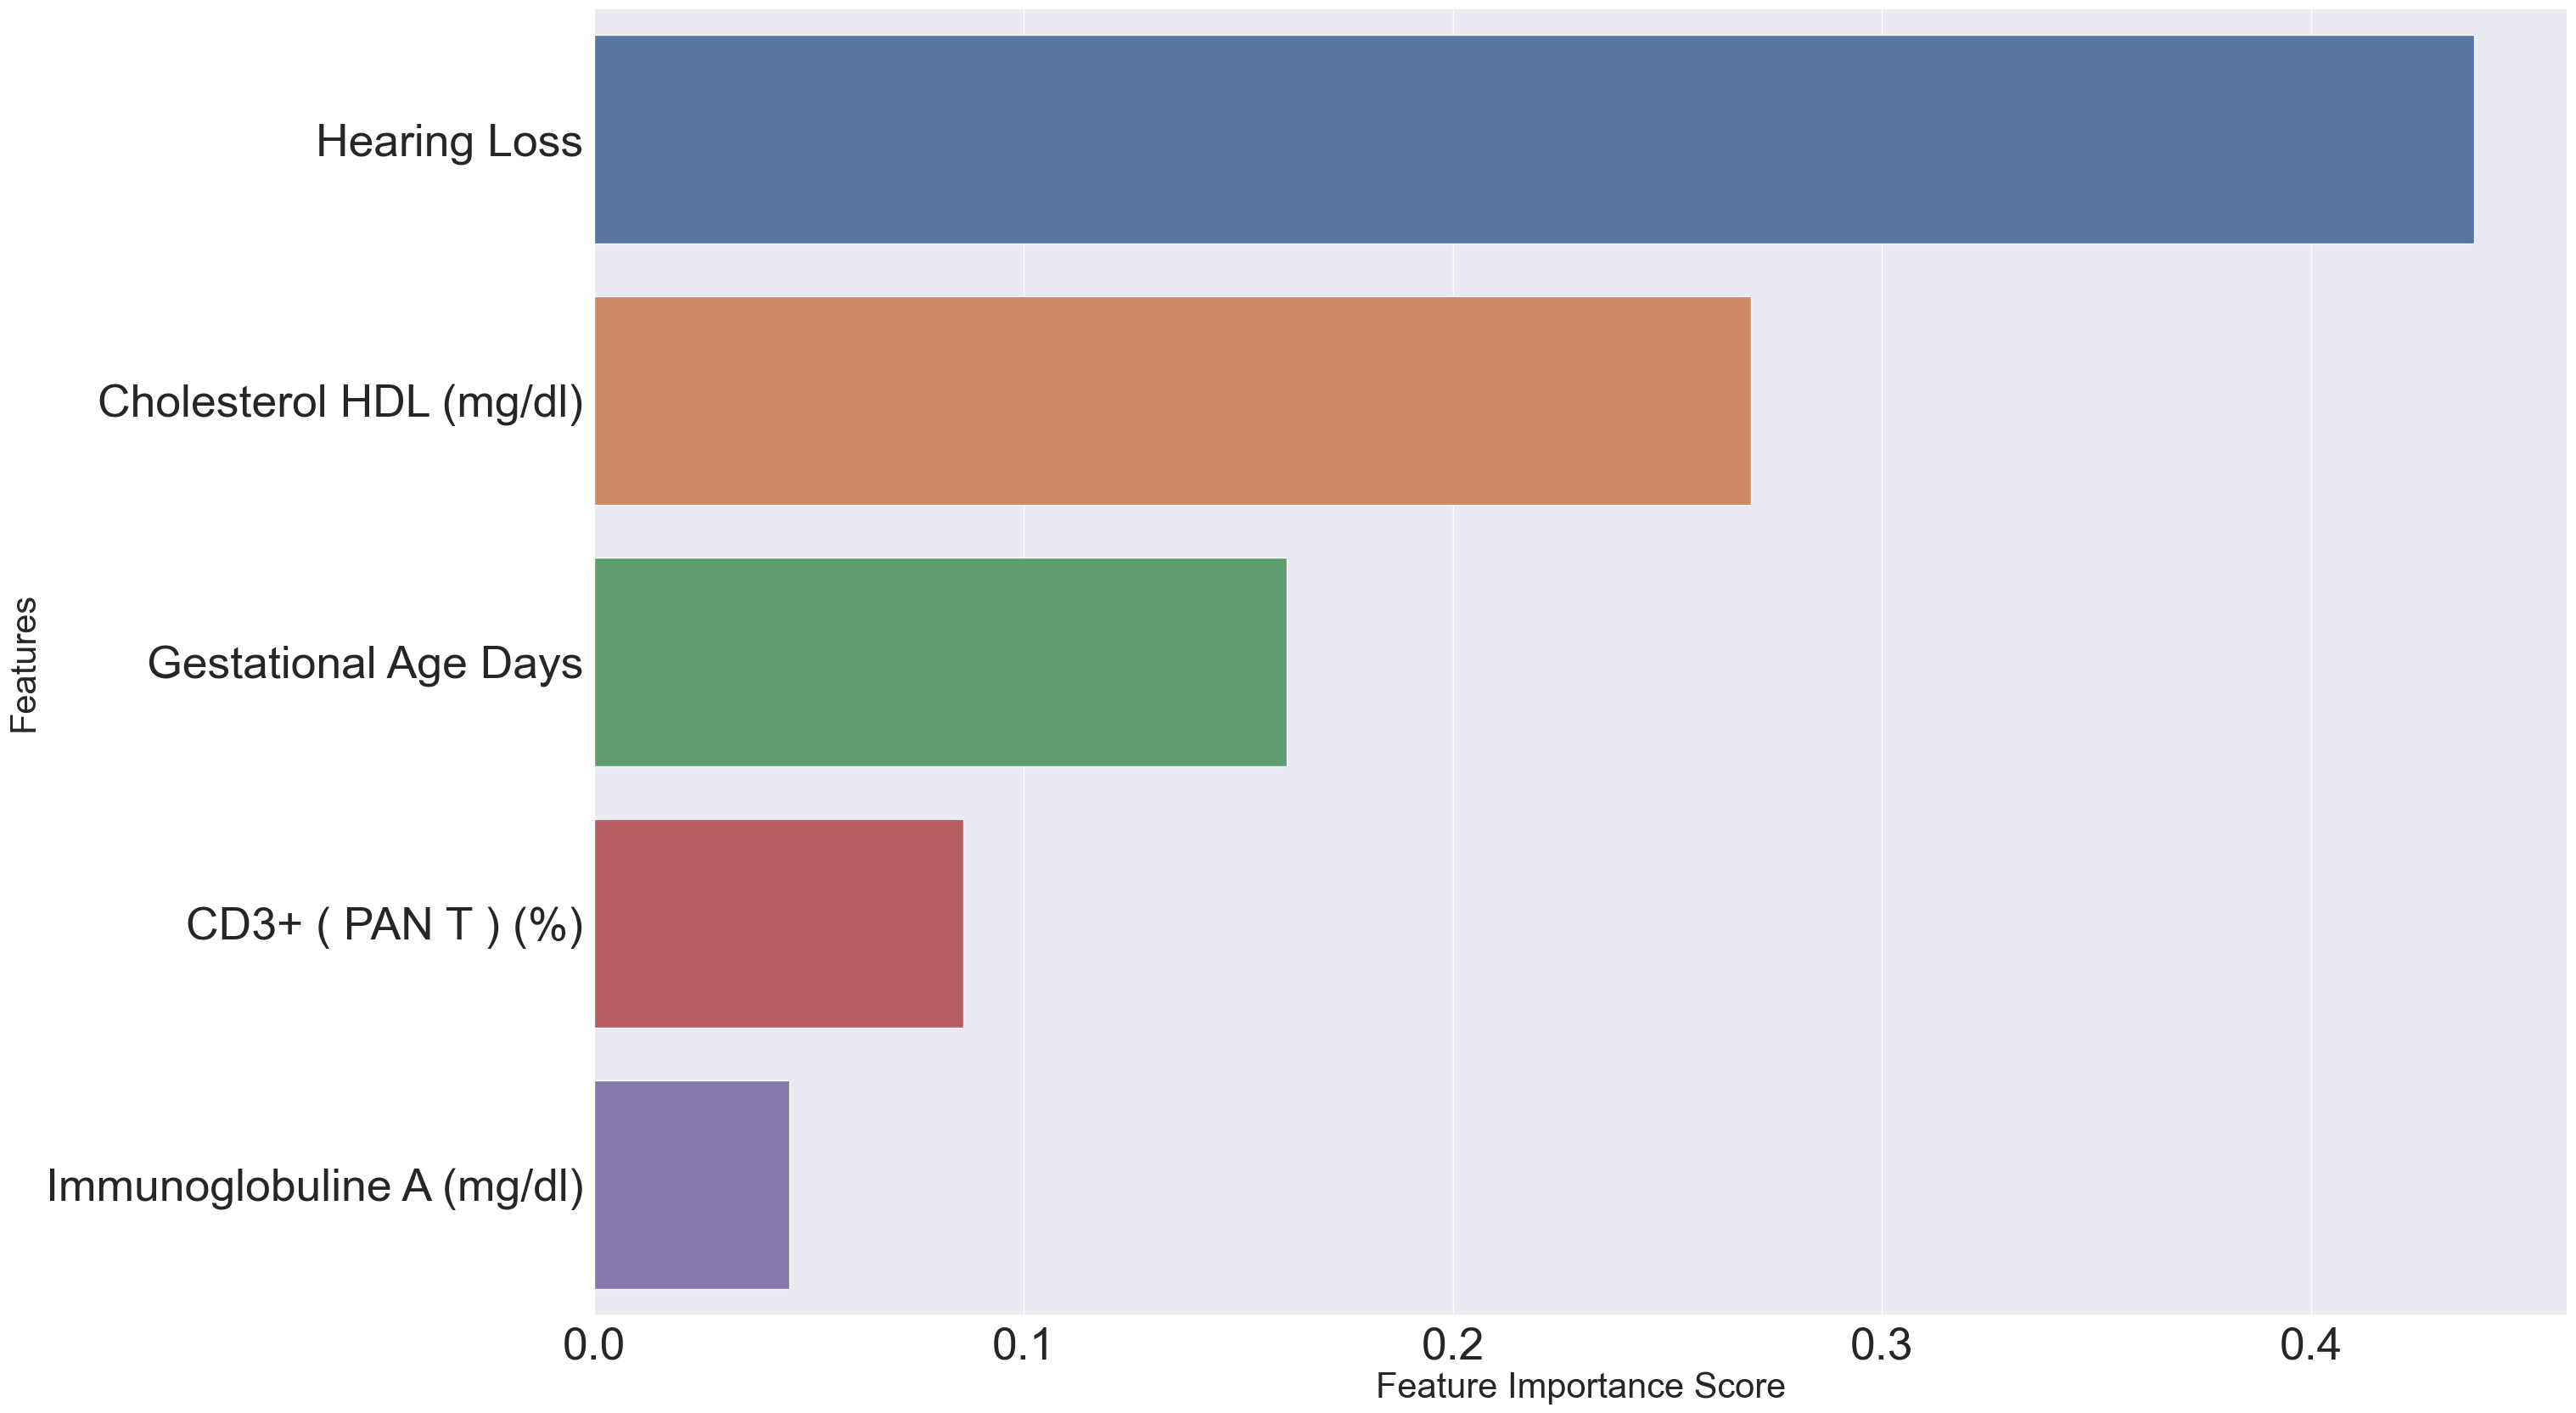

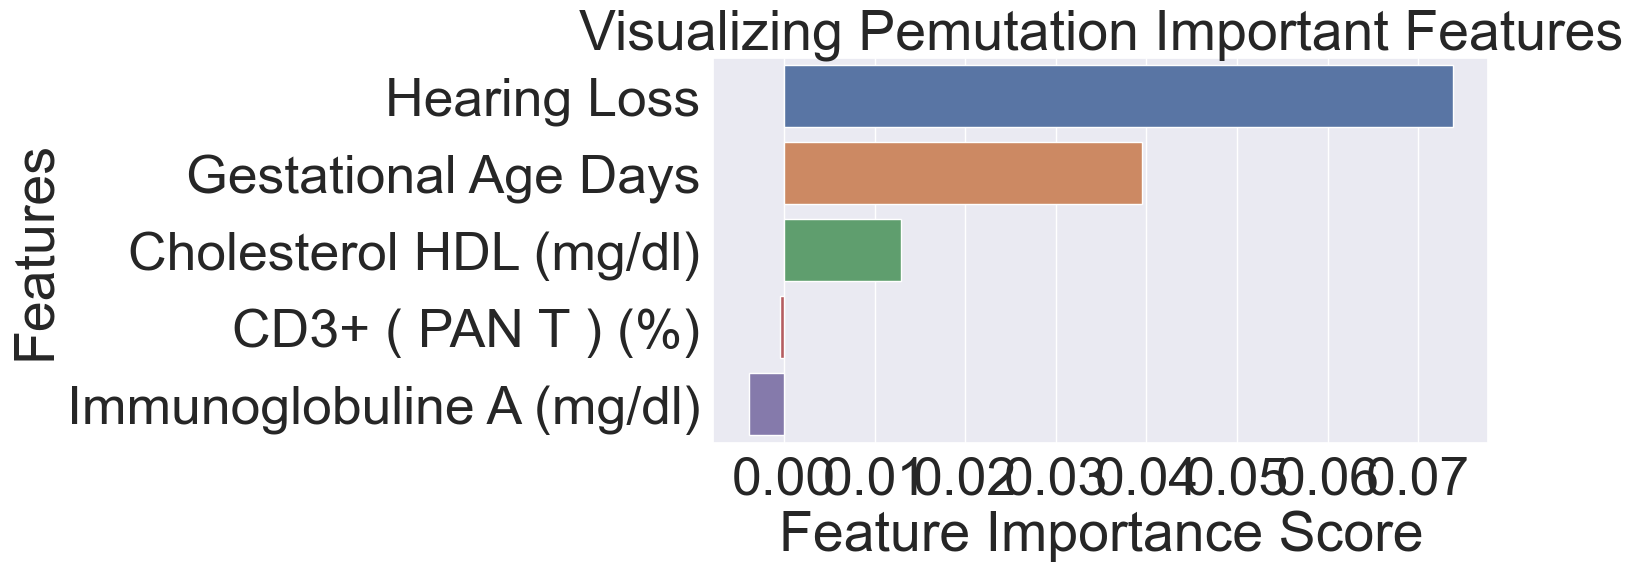

In [4]:
params = {'max_depth': 5,
          'max_features': 0.6,
          'min_samples_leaf': 20,
          'min_samples_split': 30,
          'n_estimators': 100,
          'score': 'neg_mean_squared_error',
          'train_size': 0.7}

features = ['CD3+ ( PAN T ) (%)', 'Cholesterol HDL (mg/dl)', 'Immunoglobuline A (mg/dl)', 'Gestational Age Days',
            'Hearing Loss']

score = 'neg_mean_squared_error'

forest = utils.feature_importance_model(RandomForest, X, y, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()

# Data Augmentation

In [5]:
#df = utils.data_augmentation(df, 'AE')                   
#utils.save(df, './data/aug_downsyndrom')      

df = pd.read_csv('./data/aug_downsyndrom.csv', delimiter=';')

df = utils.treat_nan(df)


X = df.drop(columns=['AE', 'AE_cat'], axis=1)
y = df['AE']
y_cat = df['AE_cat']

/usr/local/Caskroom/miniconda/base/envs/ml4down/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


==> MSE: 0.09539811954456816
==> R2": 0.6744483596481092



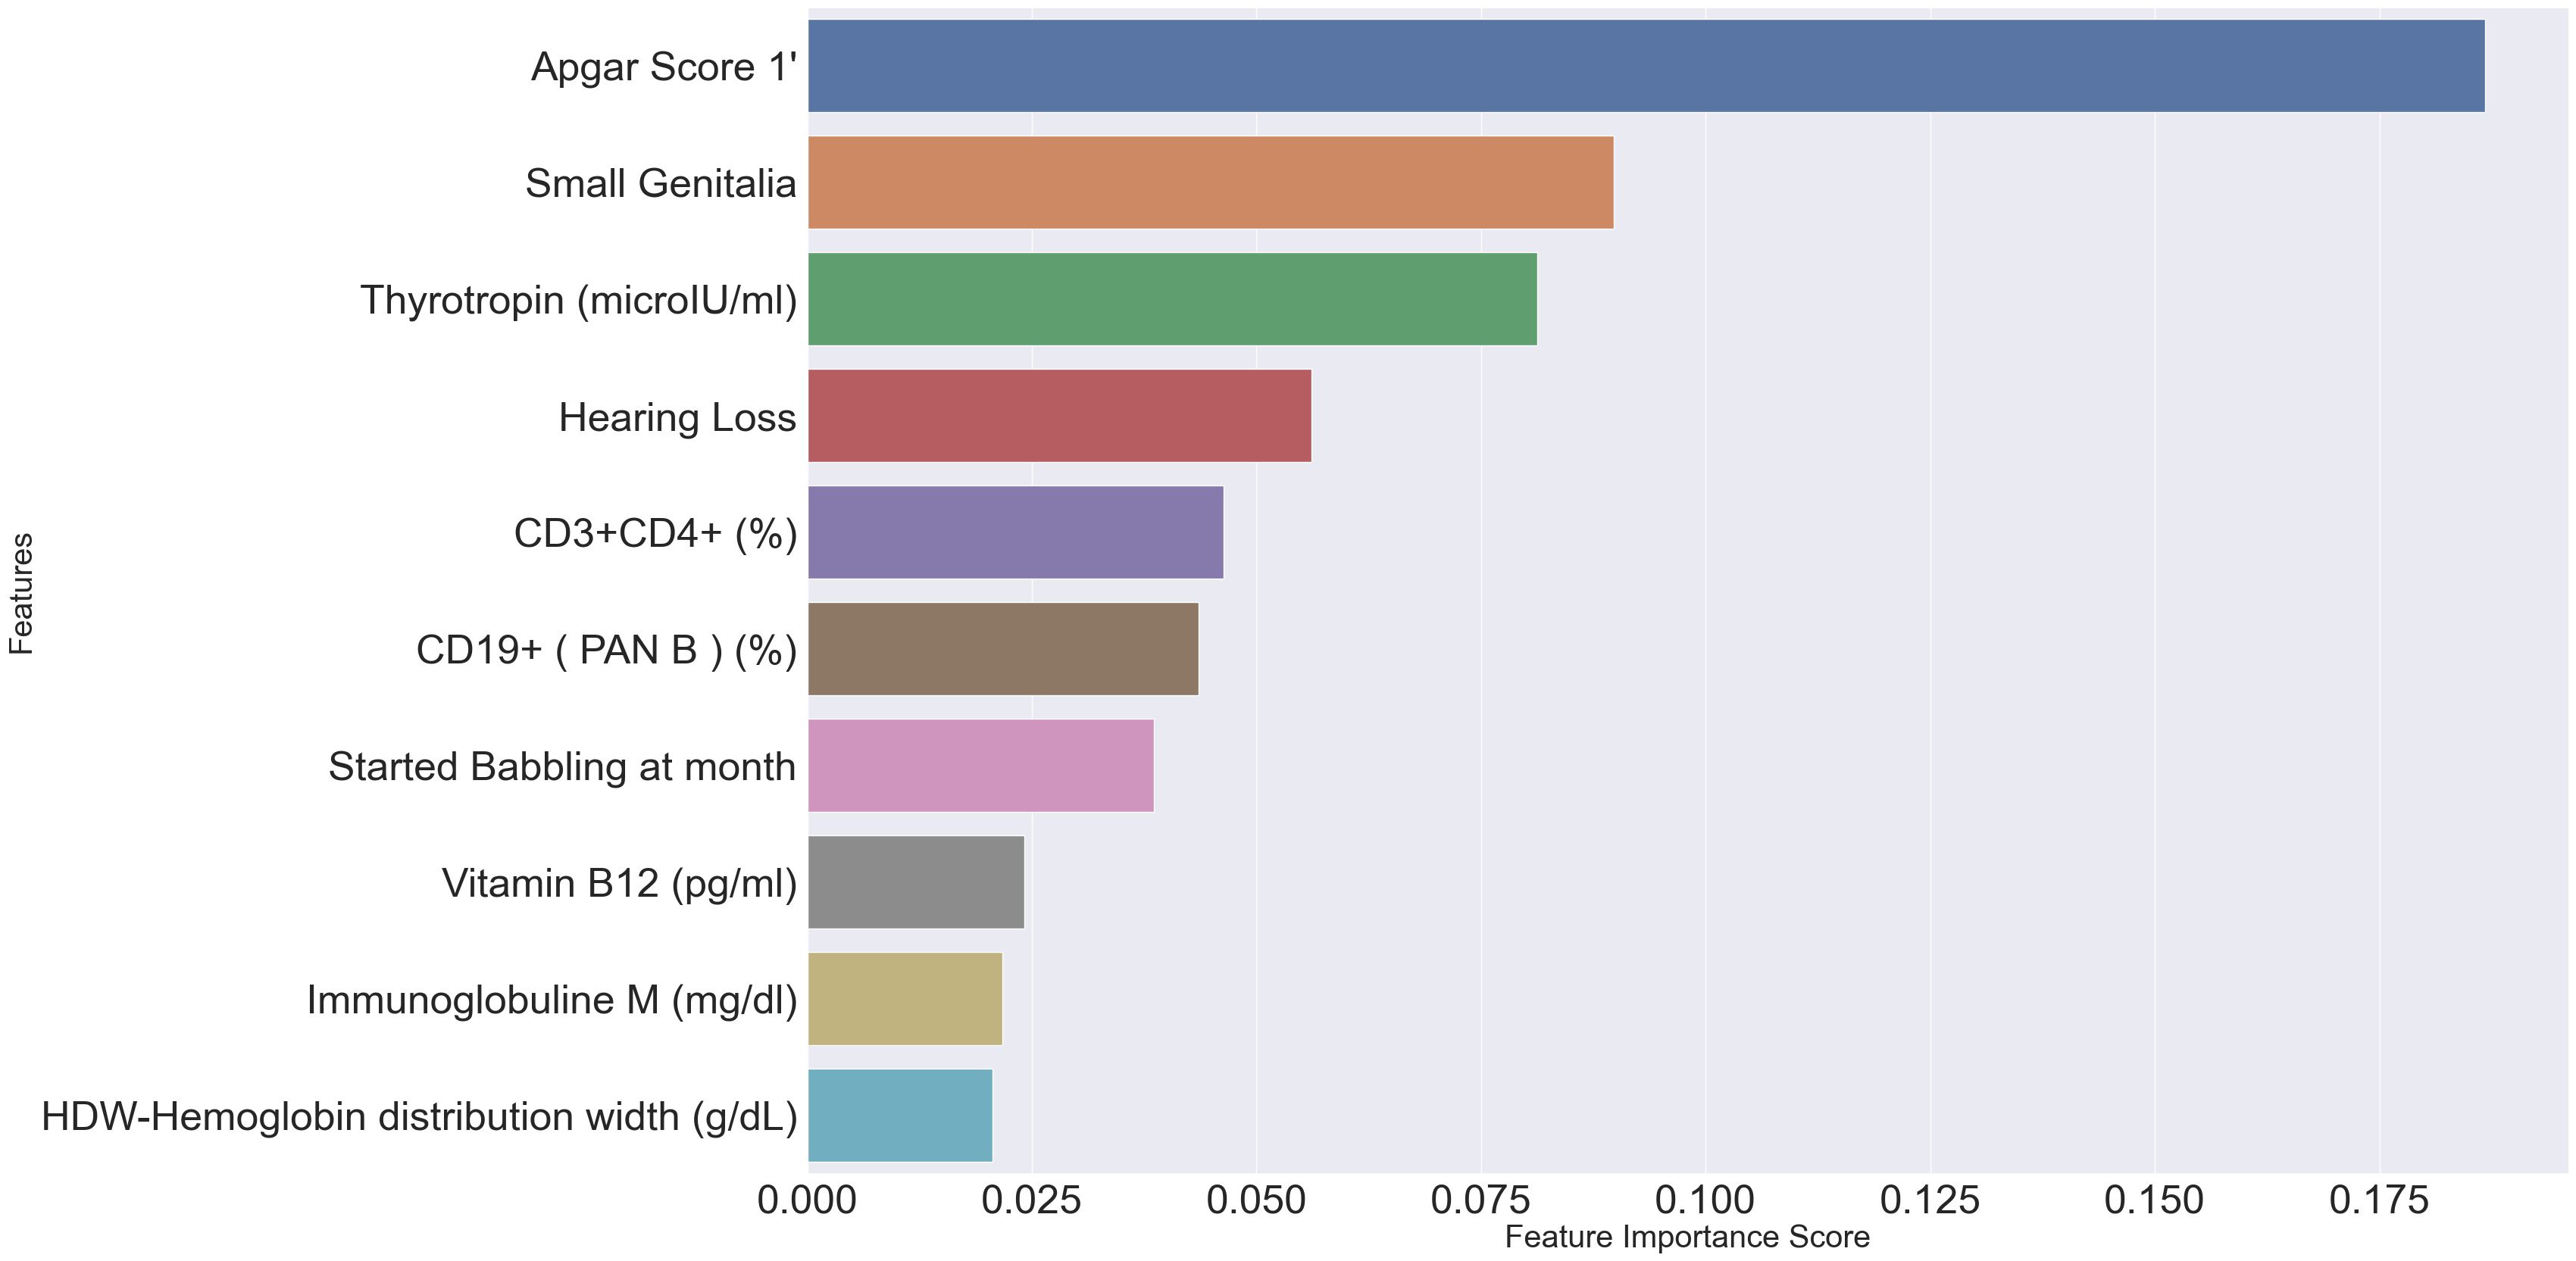

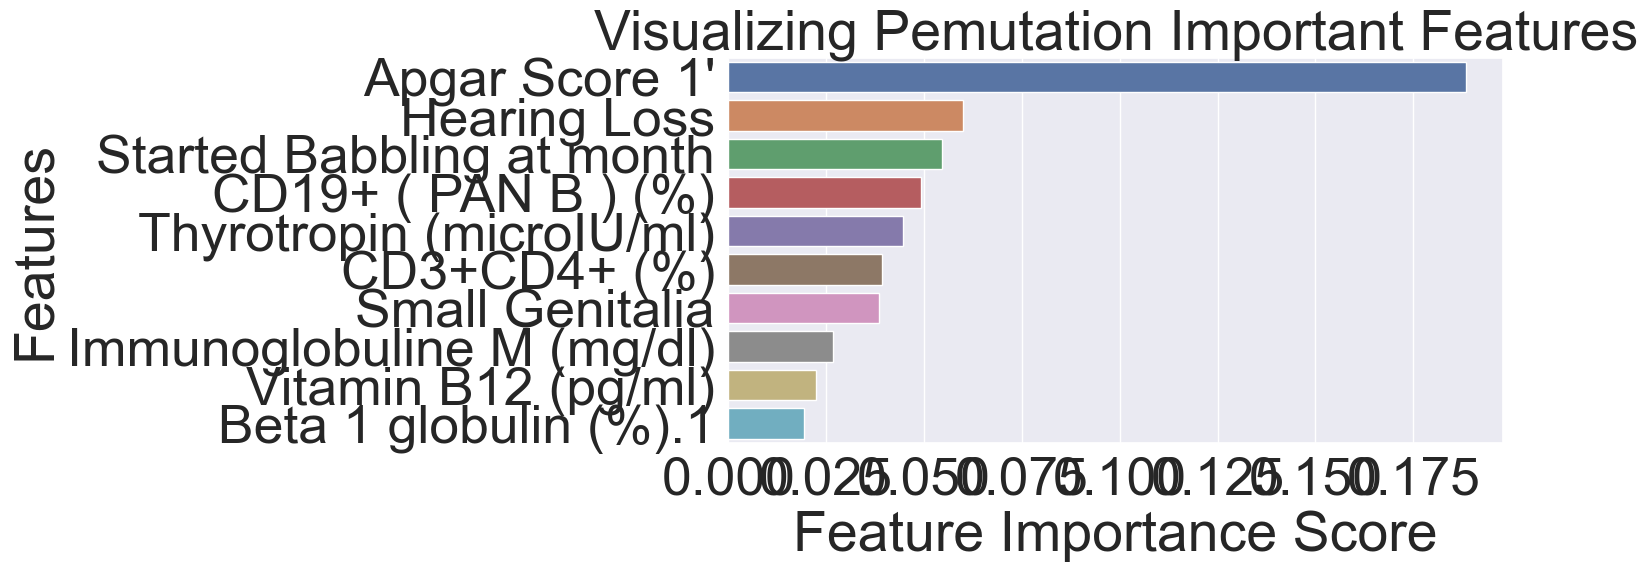

In [6]:
params = {'max_depth': 13,
          'max_features': 0.6,
          'min_samples_leaf': 20,
          'min_samples_split': 30,
          'n_estimators': 50, 
          'score': 'neg_mean_squared_error',
          'train_size': 0.7}

features = ['Sex', 'Hematocrit (%)', 'MCH-Mean corpuscular hemoglobin (pg)',
            'RDWRed blood cells distribution width (%)', 'HDW-Hemoglobin distribution width (g/dL)',
            'Neutrophils (10^3/mmc)', 'Lymphocytes  (10^3/mmc)', 'Monocytes  (10^3/mmc)', 'Eosinophils (10^3/mmc)',
            'CD3+CD4+ (%)', 'CD56+CD16+CD3- ( NK ) (%)', 'CD19+ ( PAN B ) (%)', 'Creatinine (mg/dl)',
            'Uric acid (mg/dL)', 'Cholesterol HDL (mg/dl)', 'Potassium (mmol/L)', 'Chloride (mmol/L)',
            'Zinc (micromol/L)', 'Magnesium (mg/dL)', 'Total protein (g/dL)', 'Albumin', 'Direct bilirubin (mg/dL)',
            'Indirect bilirubin (mg/dL)', 'ALT-alanine Aminotransferase  (GPT-glutamic-pyruvic transaminase) (U/L)',
            'Iron (microgr/dL)', 'Ferritin (ng/mL)', 'Folic acid (ng/mL)', 'Vitamin B12 (pg/ml)',
            'Immunoglobuline A (mg/dl)', 'Immunoglobuline M (mg/dl)', 'Thyrotropin (microIU/ml)',
            'Free triiodothyonine (FT3) (pg/mL)', 'Anti-thyroglobulin Antibody (AbTg) (UI/mL)',
            'TPO-Thyroid peroxidase antibodies (UI/mL)', 'Albumin (%)', 'Beta 1 globulin (%).1',
            'Deaminated gliadin peptide IgG Antibodies (U/mL)', 'MTHFR Genotype', 'Birth Length cm',
            'Birth OFC cm', "Apgar Score 1'", 'Started Sitting at month', 'Started Babbling at month',
            'Started Walking at month', 'Sphincter Control at month', 'Weight Kg', 'Flat Facial Profile',
            'Hearing Loss', 'Strabismus', 'Myopia', 'Heart Surgery', 'Duodenal Atresia', 'Imperforate Anus',
            'Hirschprung Disease', 'Obstructive Sleep Apnea', 'Seizures', 'TSH µU per mL', 'Celiac Disease',
            'Small Genitalia', "Jackson's Signs - Yes"]

score = 'neg_mean_squared_error'

forest = utils.feature_importance_model(RandomForest, X, y, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()

==> Accuracy:               precision    recall  f1-score   support

         1.0       0.81      0.76      0.78       939
         2.0       0.71      0.77      0.74       731

    accuracy                           0.77      1670
   macro avg       0.76      0.77      0.76      1670
weighted avg       0.77      0.77      0.77      1670

==> R2": 0.8451033243486074



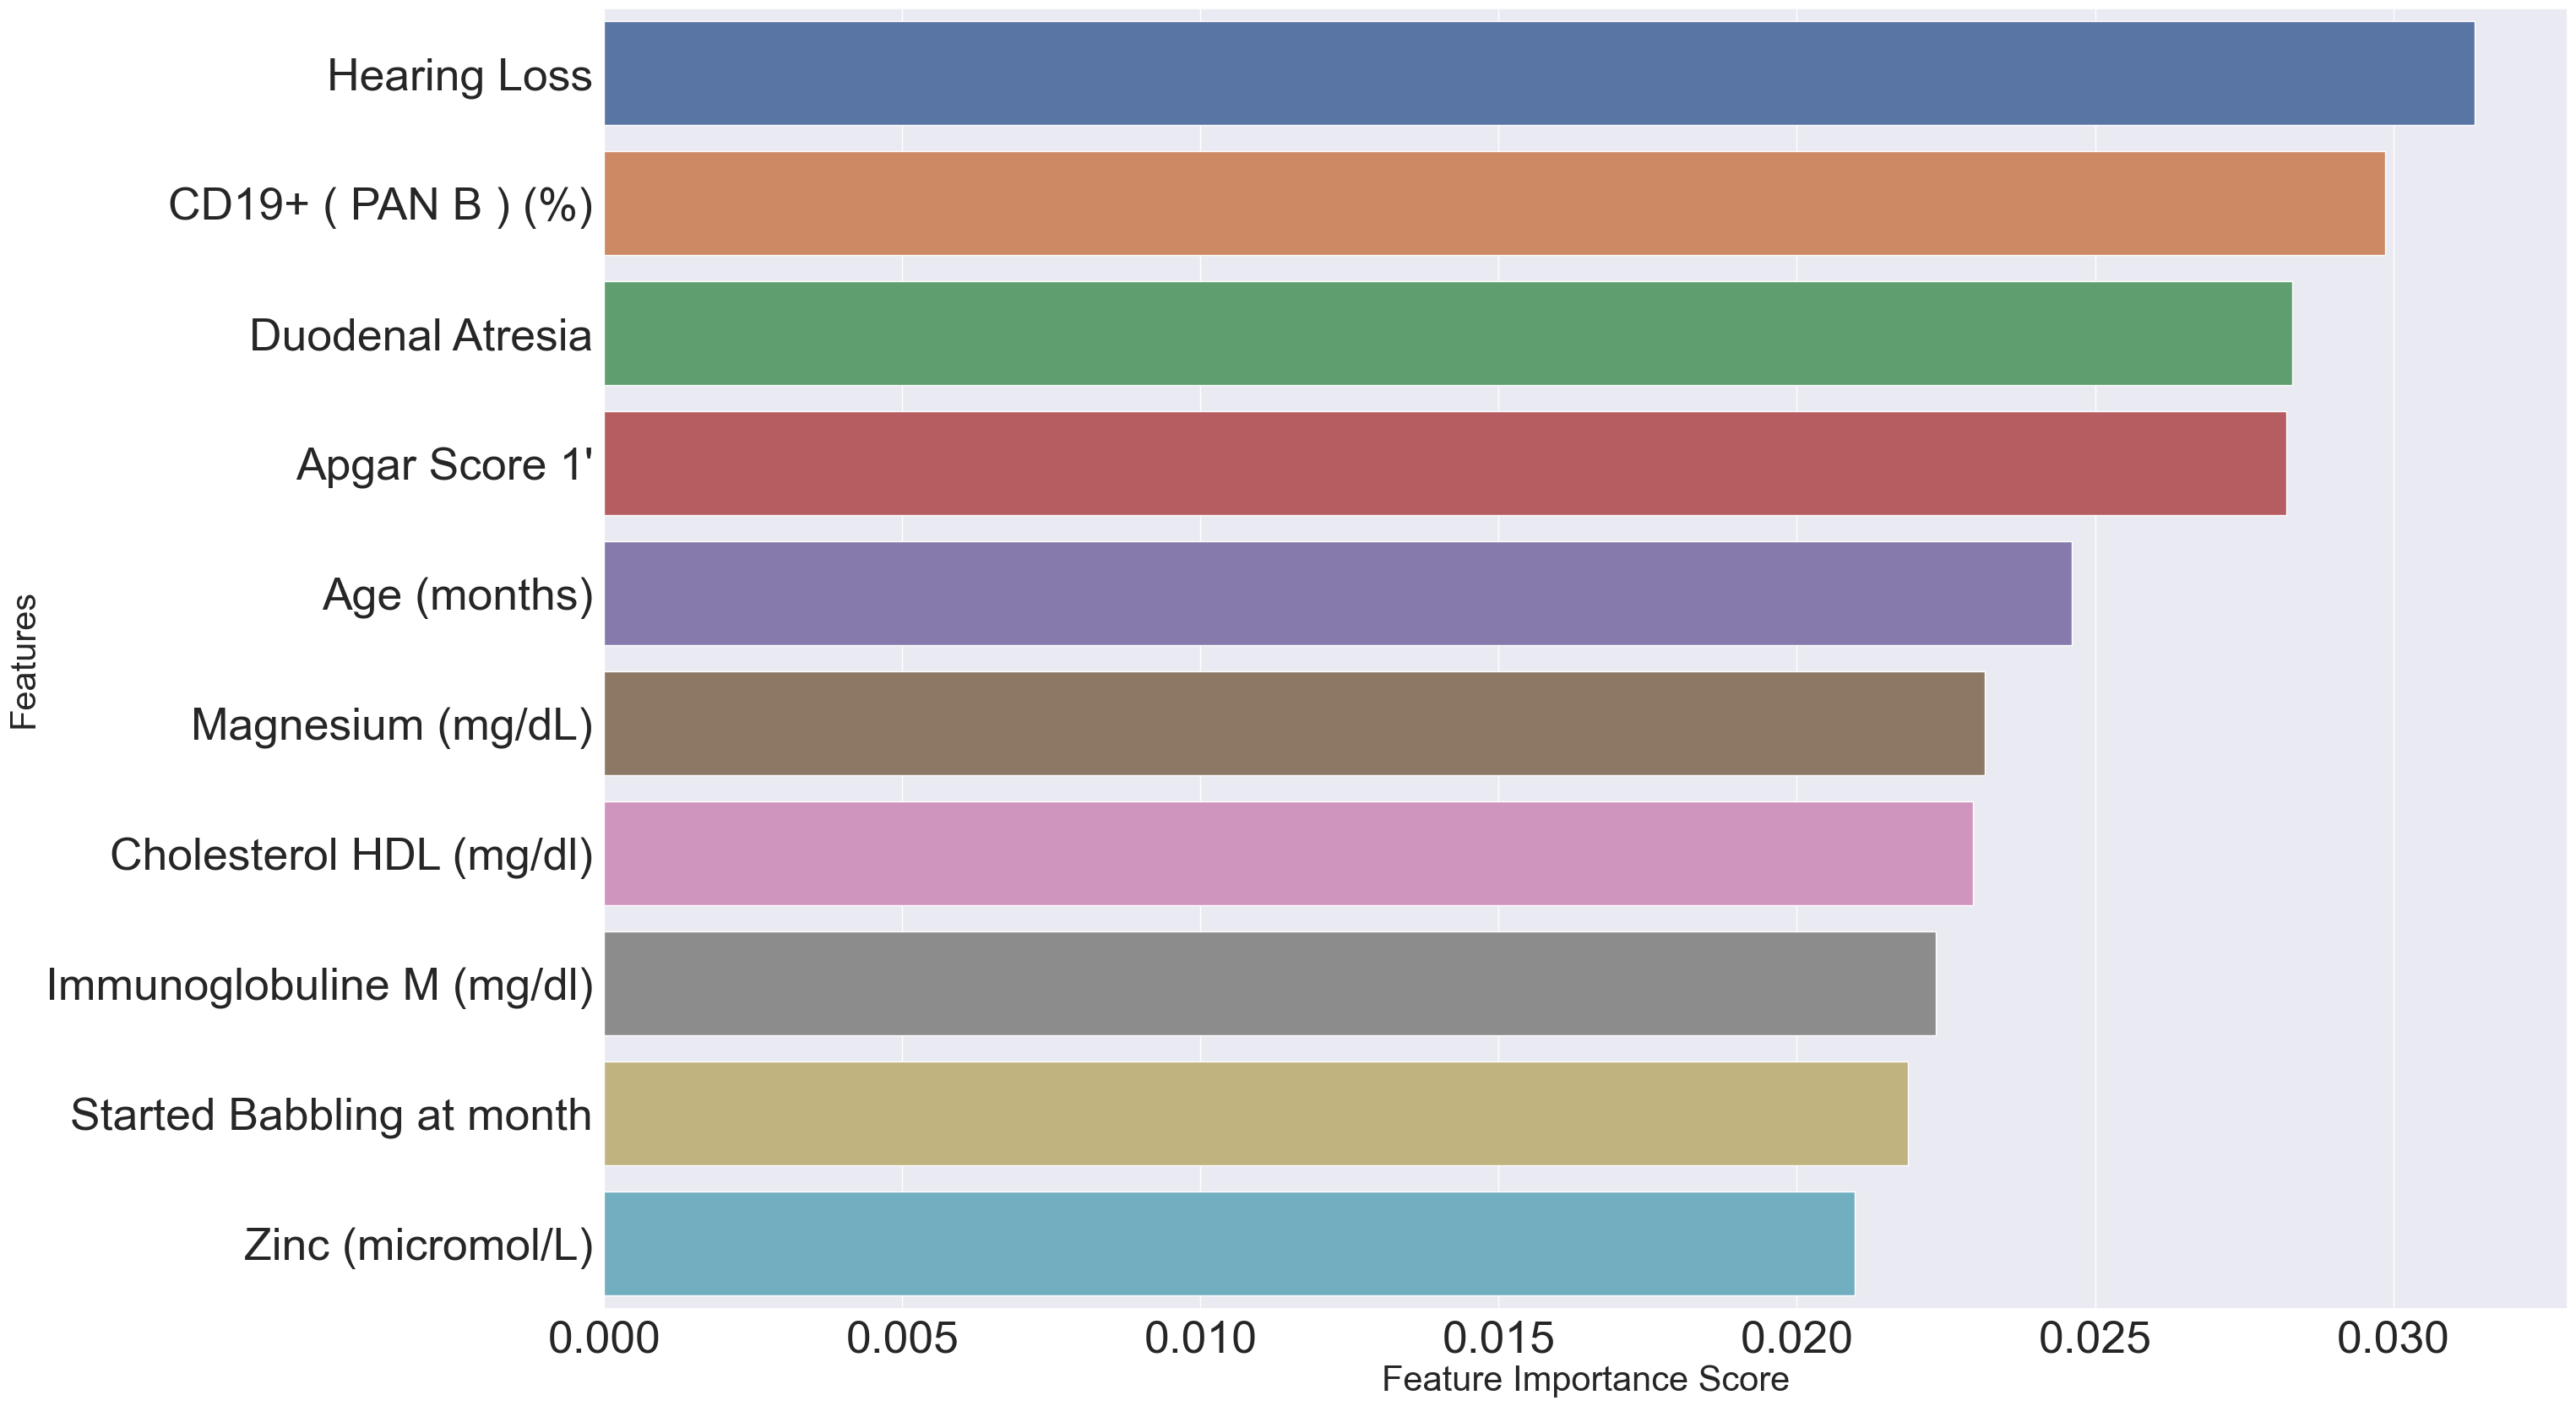

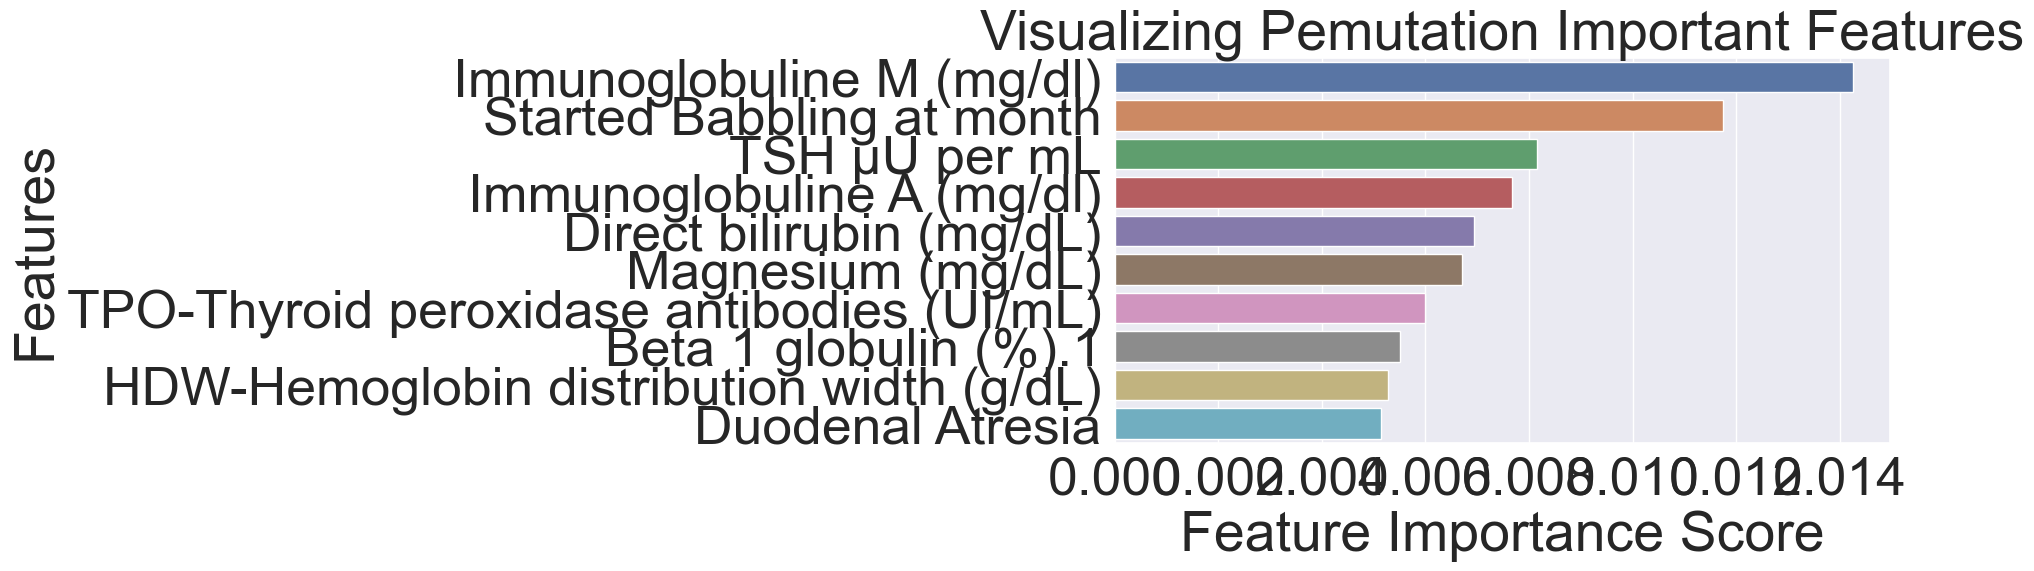

In [7]:
params = {'max_depth': 13,
          'max_features': 0.1,
          'min_samples_leaf': 20,
          'min_samples_split': 20,
          'n_estimators': 50,
          'score': 'accuracy',
          'train_size': 0.7}

features = ['Sex', 'Age (months)', 'Erythrocytes (10^6/mmc)', 'HGB-Hemoglobin (g/dL)', 'Hematocrit (%)',
            'MCV-Mean corpuscular volume (fL)', 'MCH-Mean corpuscular hemoglobin (pg)', 
            'MCHC-Mean corpuscular hemoglobin concentration (g/dL)', 'RDWRed blood cells distribution width (%)',
            'HDW-Hemoglobin distribution width (g/dL)', 'Neutrophils (10^3/mmc)', 'Lymphocytes  (10^3/mmc)',
            'Monocytes  (10^3/mmc)', 'Basophils (10^3/mmc)', 'Platelet count (10^3/microL)',
            'MPV-Mean platelet volume (fL)', 'CD3+ ( PAN T ) (%)', 'CD3+CD4+ (%)', 'CD3+CD4+ (Helper) (mmc)',
            'CD56+CD16+CD3- ( NK ) (%)', 'CD19+ ( PAN B ) (%)', 'Glucose (mg/dL)', 'Fructosamine (micromol/L)',
            'Urea (mg/dl)', 'Creatinine (mg/dl)', 'Uric acid (mg/dL)', 'Total cholesterol (mg/dL)', 
            'Triglycerides (mg/dL)', 'Cholesterol HDL (mg/dl)', 'Sodium (mmol/L)', 'Potassium (mmol/L)',
            'Chloride (mmol/L)', 'Zinc (micromol/L)', 'Magnesium (mg/dL)', 'Total protein (g/dL)', 'Albumin',
            'Direct bilirubin (mg/dL)', 'Indirect bilirubin (mg/dL)',
            'AST-aspartate aminotransferase (GOT-glutamic-oxaloacetic transaminase) (U/L)',
            'ALT-alanine Aminotransferase  (GPT-glutamic-pyruvic transaminase) (U/L)', 'Iron (microgr/dL)',
            'Transferrin (mg/dL)', 'Ferritin (ng/mL)', 'Folic acid (ng/mL)', 'Vitamin B12 (pg/ml)',
            'Immunoglobuline G (mg/dl)', 'Immunoglobuline A (mg/dl)', 'Immunoglobuline M (mg/dl)',
            'Anti-insulin antibodies', 'Human tissue transglutaminase IgA antibodies (U/mL)',
            'Thyrotropin (microIU/ml)', 'Free triiodothyonine (FT3) (pg/mL)', 'Free thyroxine (FT4)  (pg/mL)',
            'Anti-thyroglobulin Antibody (AbTg) (UI/mL)', 'TPO-Thyroid peroxidase antibodies (UI/mL)', 'Albumin (%)',
            'Alpha 1 globulin (%)', 'Alpha 2 globulin (%)', 'Beta 1 globulin (%)', 'Beta 1 globulin (%).1',
            'Gamma globulin(%)', 'A/G albumin/globulin ratio (1)', 'Deaminated gliadin peptide IgG Antibodies (U/mL)',
            'MTHFR Genotype', 'Mother Age yrs', 'Father Age yrs', 'Gestational Age Days', 'Birth Weight Kg', 
            'Birth Length cm', 'Birth OFC cm', "Apgar Score 1'", 'Started Sitting at month',
            'Started Babbling at month', 'Started Walking at month', 'Sphincter Control at month', 'Weight Kg', 
            'Height cm', 'OFC cm', 'BMI', 'Flat Facial Profile', 'Small Ears', 'Hearing Loss', 'Strabismus', 'Myopia',
            'Heart Surgery', 'Separation of the Abdominal Muscle', 'Duodenal Atresia', 'Imperforate Anus',
            'Hirschprung Disease', 'Obstructive Sleep Apnea', 'Seizures', 'Hypothyroidism', 'TSH µU per mL',
            'Celiac Disease', 'Small Genitalia', 'Masticatory Disfunction', 'Constipation', 'Diarrhea',
            "Jackson's Signs - Yes"]

score = 'accuracy'

forest = utils.feature_importance_model(RandomForest, X, y_cat, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()

In [8]:
target_var = 'Age (months)'
#df = df.sort_values("Age (months)")  # for plotting purposes
df = utils.effect_mitigation(df)
X = df.drop(columns=['AE', 'Age (months)', 'AE_cat'], axis=1)
y = df['AE']
#y_cat = df['AE_cat']

==> MSE: 0.0954331681032604
==> R2": 0.6720645391976112



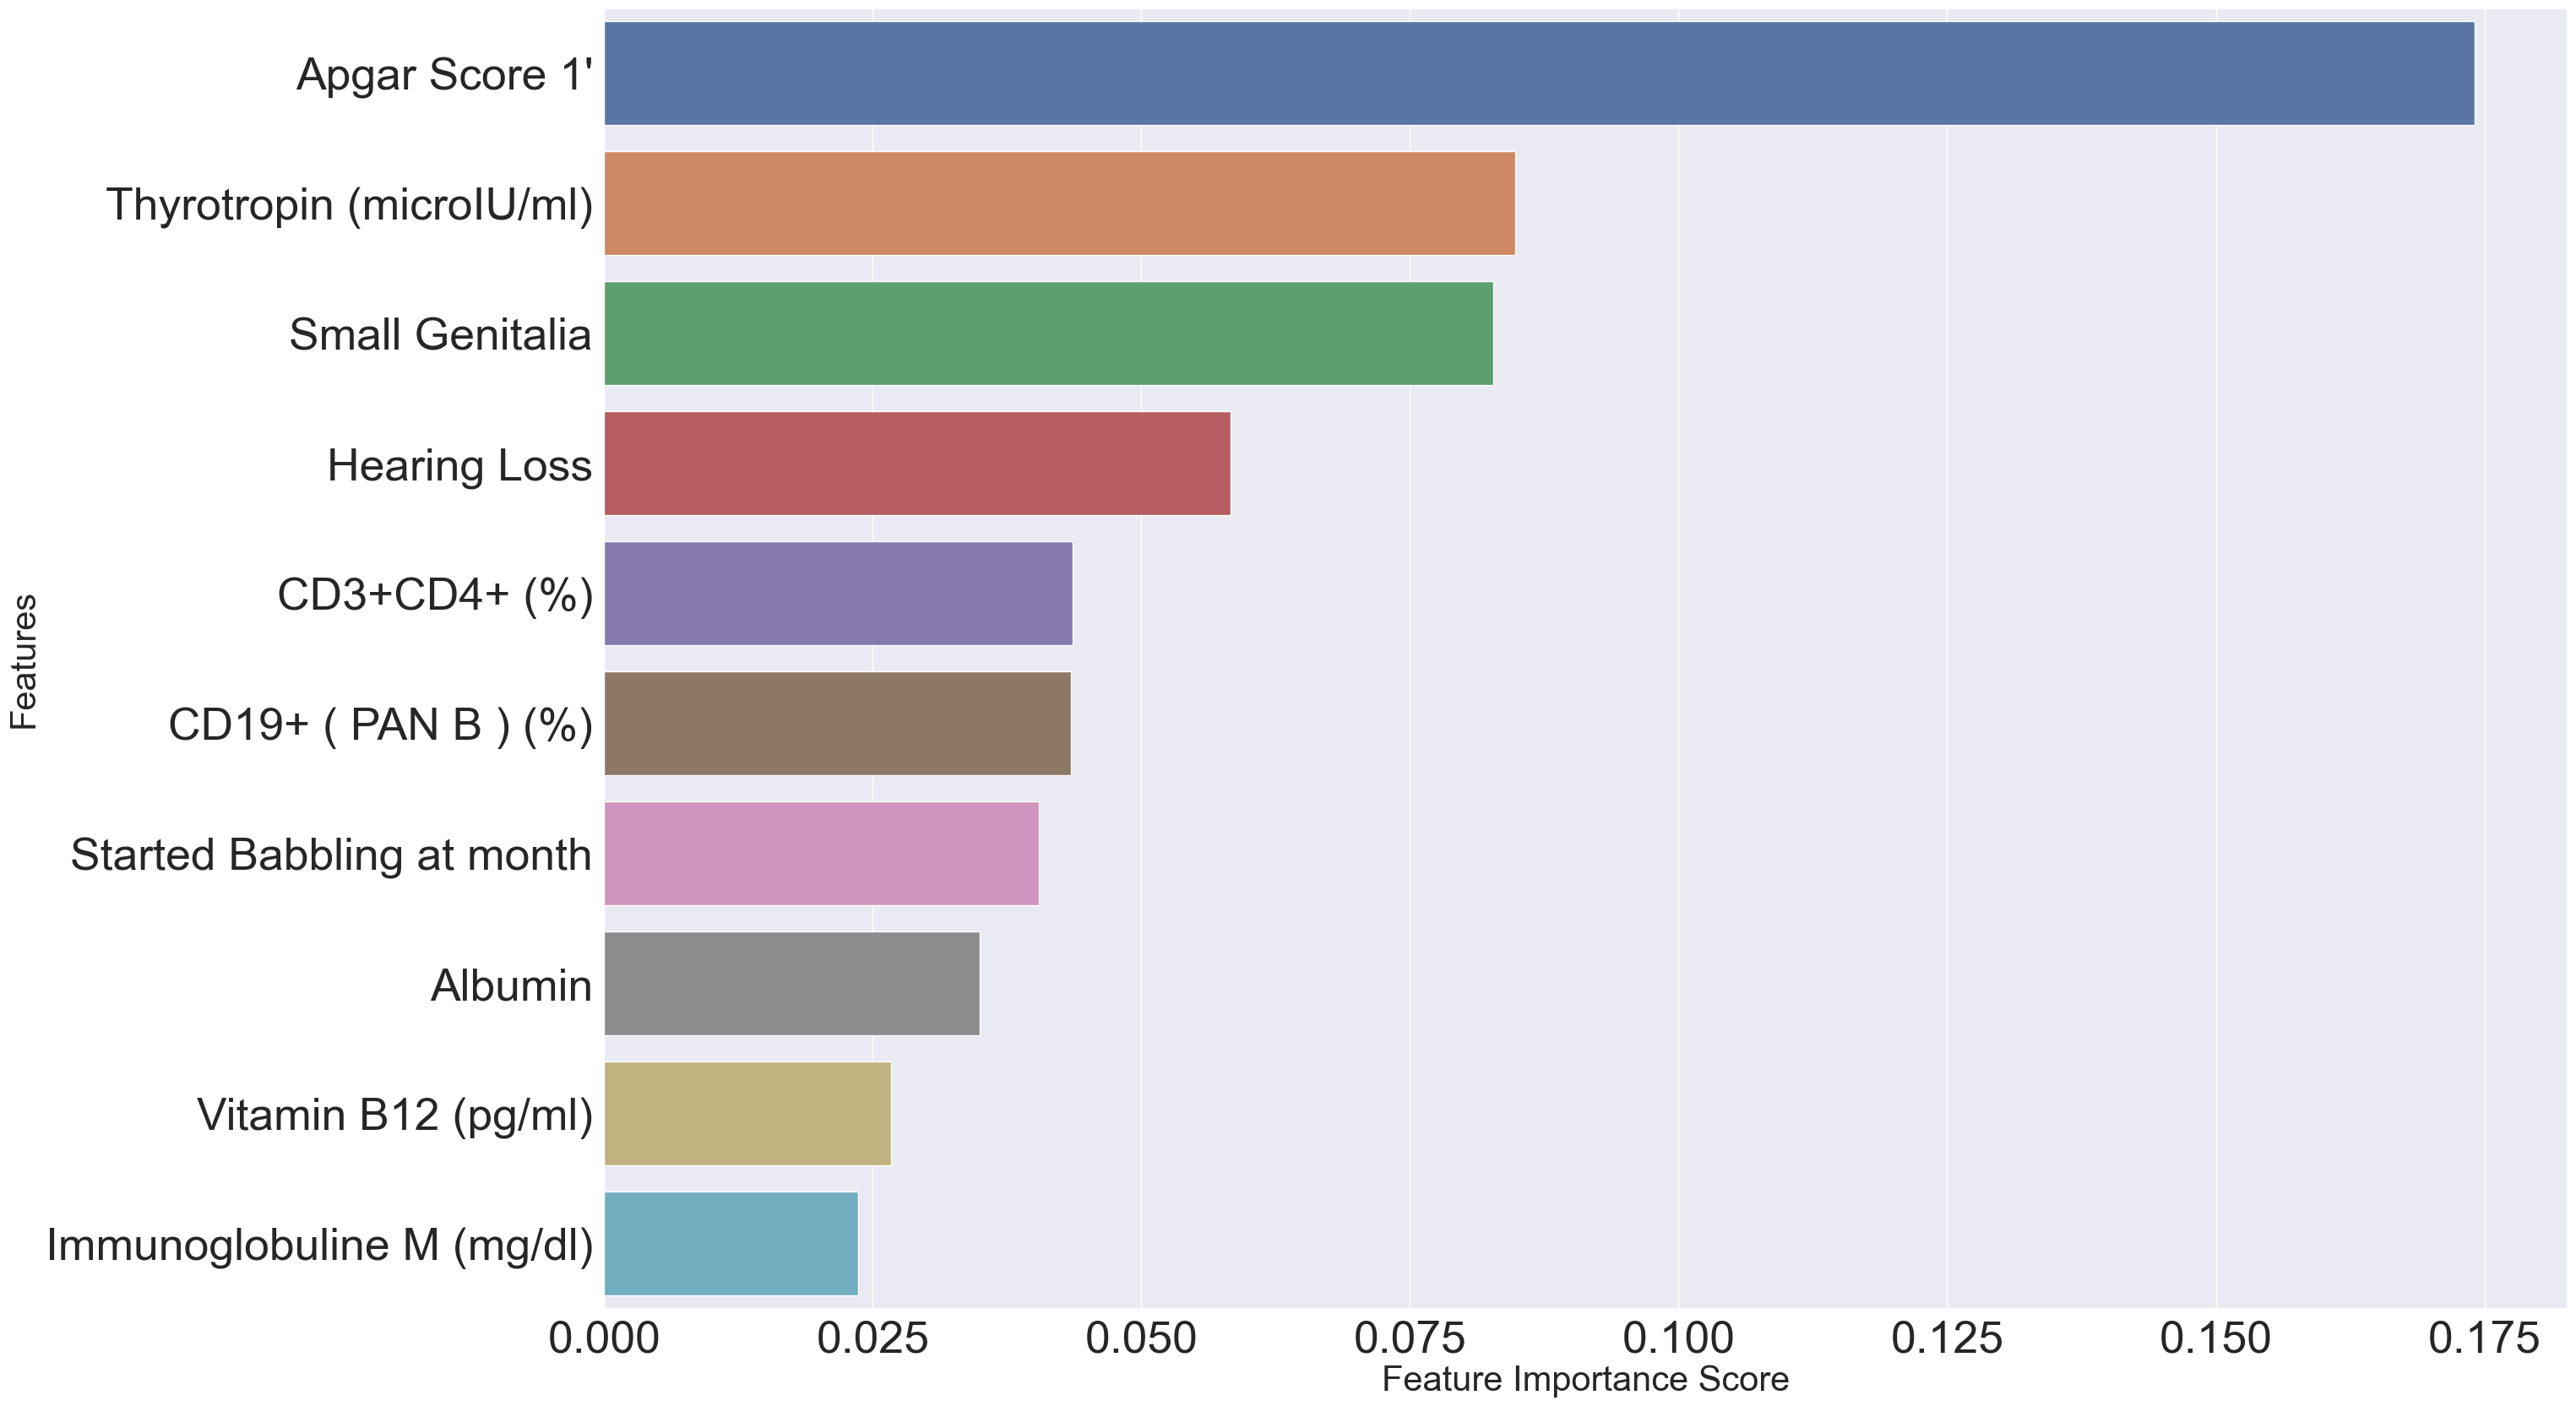

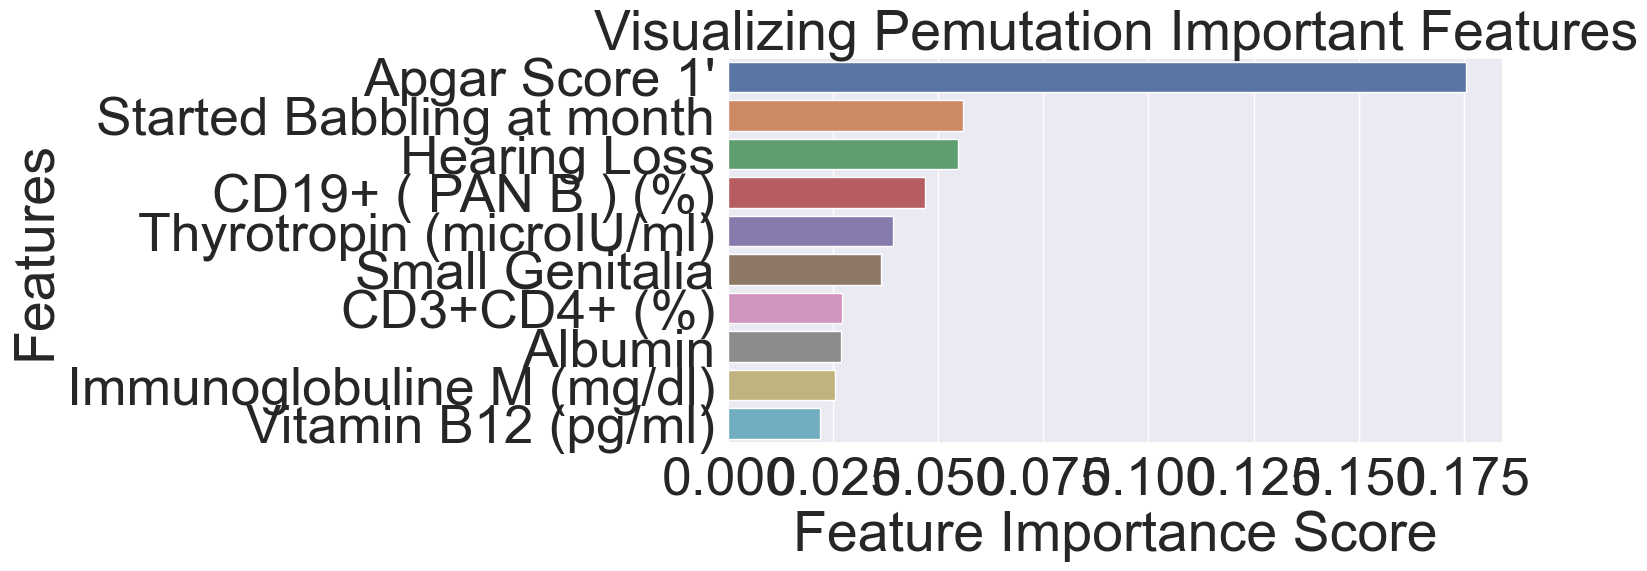

In [9]:
params = {'max_depth': 13, 
          'max_features': 0.5, 
          'min_samples_leaf': 20,
          'min_samples_split': 30, 
          'n_estimators': 100,
          'score': 'neg_mean_squared_error',
          'train_size': 0.7}

features = ['Sex', 'Hematocrit (%)', 'MCH-Mean corpuscular hemoglobin (pg)',
            'RDWRed blood cells distribution width (%)', 'HDW-Hemoglobin distribution width (g/dL)',
            'Neutrophils (10^3/mmc)', 'Lymphocytes  (10^3/mmc)', 'Monocytes  (10^3/mmc)', 'CD3+CD4+ (%)',
            'CD56+CD16+CD3- ( NK ) (%)', 'CD19+ ( PAN B ) (%)', 'Creatinine (mg/dl)', 'Uric acid (mg/dL)', 
            'Cholesterol HDL (mg/dl)', 'Potassium (mmol/L)', 'Chloride (mmol/L)', 'Zinc (micromol/L)',
            'Magnesium (mg/dL)', 'Albumin', 'Direct bilirubin (mg/dL)', 'Indirect bilirubin (mg/dL)', 
            'ALT-alanine Aminotransferase  (GPT-glutamic-pyruvic transaminase) (U/L)', 'Iron (microgr/dL)',
            'Ferritin (ng/mL)', 'Folic acid (ng/mL)', 'Vitamin B12 (pg/ml)', 'Immunoglobuline A (mg/dl)', 
            'Immunoglobuline M (mg/dl)', 'Thyrotropin (microIU/ml)', 'Free triiodothyonine (FT3) (pg/mL)',
            'Anti-thyroglobulin Antibody (AbTg) (UI/mL)', 'TPO-Thyroid peroxidase antibodies (UI/mL)', 
            'Albumin (%)', 'Alpha 1 globulin (%)', 'Beta 1 globulin (%).1',
            'Deaminated gliadin peptide IgG Antibodies (U/mL)', 'MTHFR Genotype', 'Birth Length cm', 
            'Birth OFC cm', "Apgar Score 1'", 'Started Sitting at month', 'Started Babbling at month', 
            'Started Walking at month', 'Sphincter Control at month', 'Weight Kg', 'Hearing Loss', 'Strabismus',
            'Myopia', 'Heart Surgery', 'Separation of the Abdominal Muscle', 'Umbilical Hernia', 'Duodenal Atresia',
            'Imperforate Anus', 'Hirschprung Disease', 'Obstructive Sleep Apnea', 'TSH µU per mL', 'Celiac Disease',
            'Small Genitalia', "Jackson's Signs - Yes"]

score = 'neg_mean_squared_error'

forest = utils.feature_importance_model(RandomForest, X, y, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()

==> Accuracy:               precision    recall  f1-score   support

         1.0       0.80      0.76      0.78       925
         2.0       0.72      0.76      0.74       745

    accuracy                           0.76      1670
   macro avg       0.76      0.76      0.76      1670
weighted avg       0.76      0.76      0.76      1670

==> R2": 0.8452830188679246



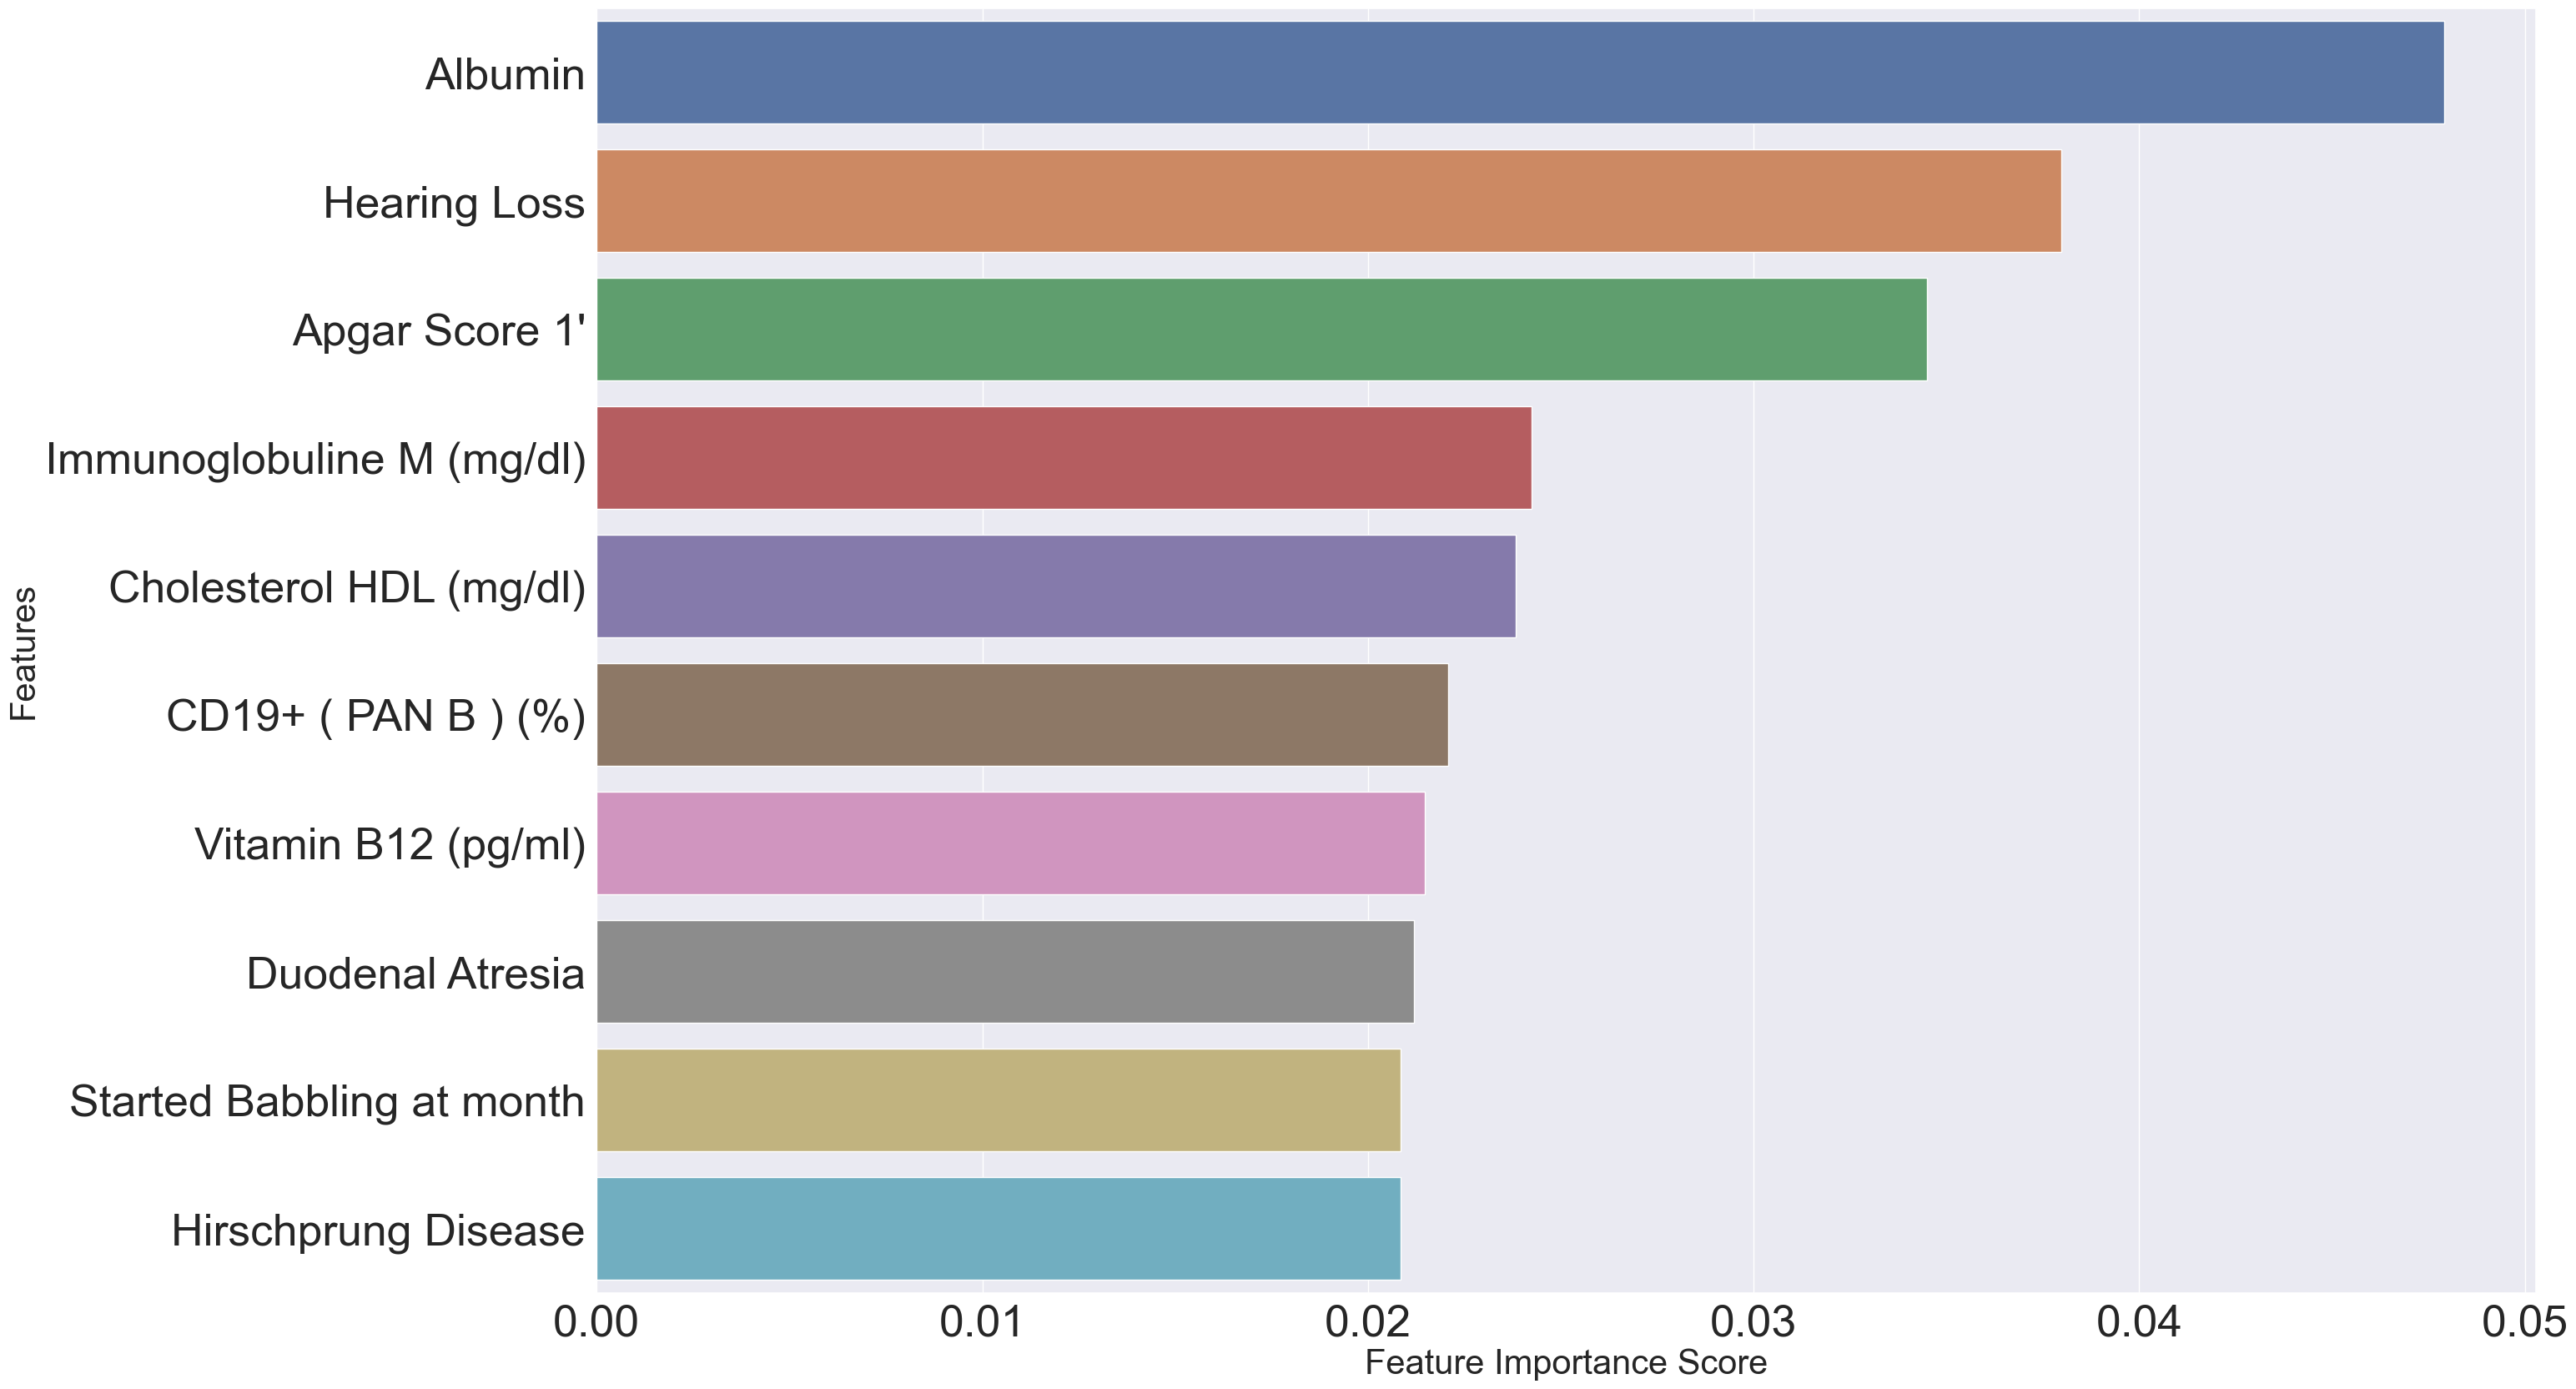

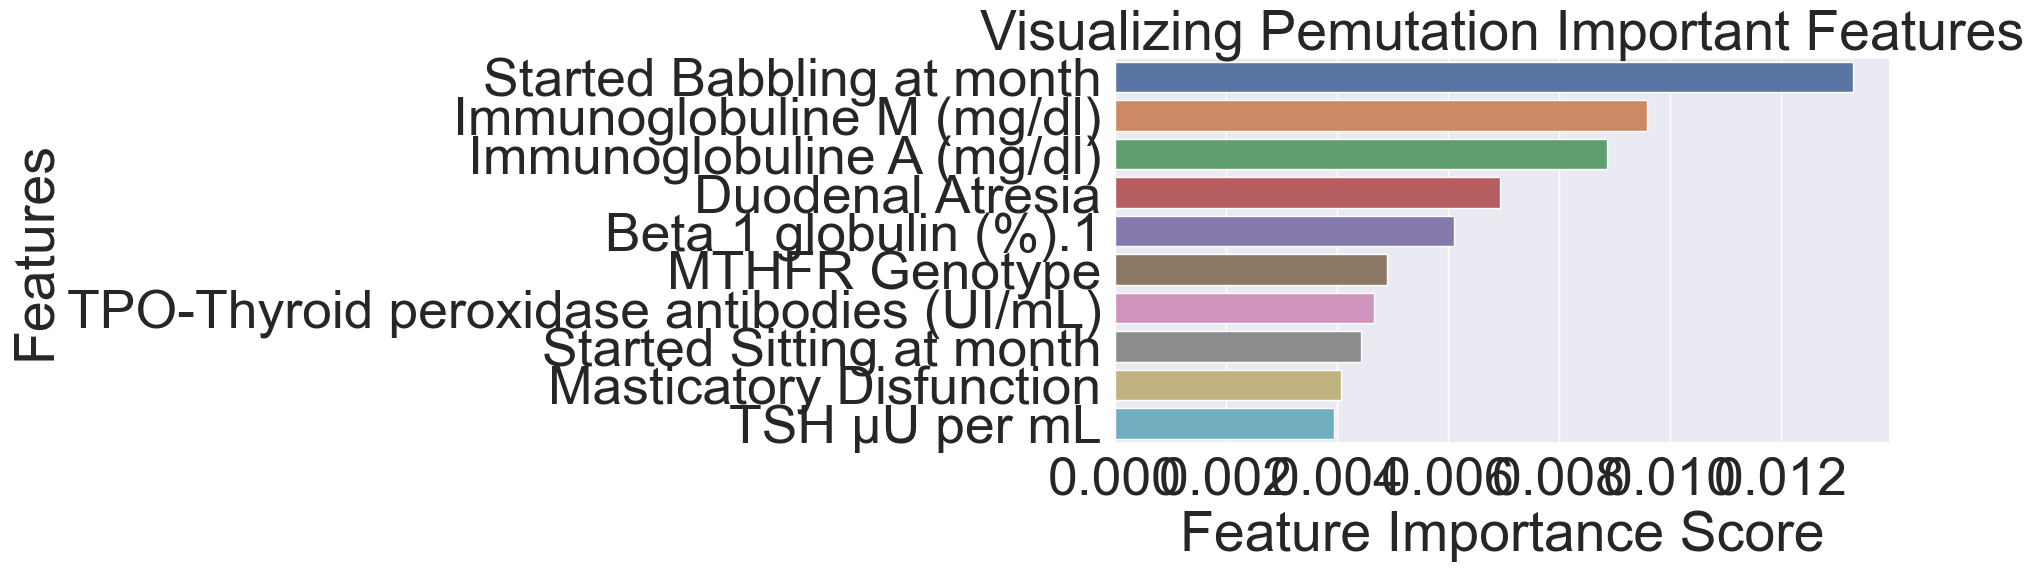

In [10]:
params = {'max_depth': 13,
          'max_features': 0.1, 
          'min_samples_leaf': 20,
          'min_samples_split': 30, 
          'n_estimators': 100, 
          'score': 'accuracy',
          'train_size': 0.7}

features = ['Sex', 'Erythrocytes (10^6/mmc)', 'HGB-Hemoglobin (g/dL)', 'Hematocrit (%)', 
            'MCV-Mean corpuscular volume (fL)', 'MCH-Mean corpuscular hemoglobin (pg)',
            'MCHC-Mean corpuscular hemoglobin concentration (g/dL)', 'RDWRed blood cells distribution width (%)',
            'HDW-Hemoglobin distribution width (g/dL)', 'Neutrophils (10^3/mmc)', 'Lymphocytes  (10^3/mmc)',
            'Monocytes  (10^3/mmc)', 'Eosinophils (10^3/mmc)', 'Basophils (10^3/mmc)', 'Platelet count (10^3/microL)',
            'MPV-Mean platelet volume (fL)', 'CD3+ ( PAN T ) (%)', 'CD3+CD4+ (%)', 'CD3+CD4+ (Helper) (mmc)',
            'CD3+CD8+ (%)', 'CD56+CD16+CD3- ( NK ) (%)', 'CD19+ ( PAN B ) (%)', 'Glucose (mg/dL)',
            'HbA1c glycated hemoglobin (mmol/mol)', 'Fructosamine (micromol/L)', 'Urea (mg/dl)', 'Creatinine (mg/dl)',
            'Uric acid (mg/dL)', 'Total cholesterol (mg/dL)', 'Triglycerides (mg/dL)', 'Cholesterol HDL (mg/dl)', 
            'Sodium (mmol/L)', 'Potassium (mmol/L)', 'Chloride (mmol/L)', 'Zinc (micromol/L)', 'Magnesium (mg/dL)',
            'Total protein (g/dL)', 'Albumin', 'Direct bilirubin (mg/dL)', 'Indirect bilirubin (mg/dL)',
            'AST-aspartate aminotransferase (GOT-glutamic-oxaloacetic transaminase) (U/L)',
            'ALT-alanine Aminotransferase  (GPT-glutamic-pyruvic transaminase) (U/L)', 'Iron (microgr/dL)', 
            'Transferrin (mg/dL)', 'Ferritin (ng/mL)', 'Folic acid (ng/mL)', 'Vitamin B12 (pg/ml)', 
            'Immunoglobuline G (mg/dl)', 'Immunoglobuline A (mg/dl)', 'Immunoglobuline M (mg/dl)', 
            'Anti-insulin antibodies', 'Human tissue transglutaminase IgA antibodies (U/mL)',
            'Thyrotropin (microIU/ml)', 'Free triiodothyonine (FT3) (pg/mL)', 'Free thyroxine (FT4)  (pg/mL)', 
            'Anti-thyroglobulin Antibody (AbTg) (UI/mL)', 'TPO-Thyroid peroxidase antibodies (UI/mL)', 'Albumin (%)',
            'Alpha 1 globulin (%)', 'Alpha 2 globulin (%)', 'Beta 1 globulin (%)', 'Beta 1 globulin (%).1',
            'Gamma globulin(%)', 'A/G albumin/globulin ratio (1)', 'Deaminated gliadin peptide IgG Antibodies (U/mL)',
            'Homocysteine (µmol/L)', 'MTHFR Genotype', 'Mother Age yrs', 'Father Age yrs', 'Gestational Age Days', 
            'Birth Weight Kg', 'Birth Length cm', 'Birth OFC cm', "Apgar Score 1'", 'Started Sitting at month',
            'Started Babbling at month', 'Started Walking at month', 'Sphincter Control at month', 'Weight Kg', 
            'Height cm', 'OFC cm', 'BMI', 'Flat Facial Profile', 'Small Ears', 'Hearing Loss', 'Strabismus', 'Myopia',
            'Heart Surgery', 'Separation of the Abdominal Muscle', 'Umbilical Hernia', 'Duodenal Atresia',
            'Imperforate Anus', 'Hirschprung Disease', 'Obstructive Sleep Apnea', 'Seizures', 'Hypothyroidism',
            'TSH µU per mL', 'Celiac Disease', 'Small Genitalia', 'Masticatory Disfunction', 'Constipation',
            'Diarrhea', "Jackson's Signs - Yes"]

score = 'accuracy'

forest = utils.feature_importance_model(RandomForest, X, y_cat, params=params, features=features, score=score)
forest.plot_importance()
forest.plot_permutation_importance()